In [1]:
import pandas as pd

In [2]:
%%time
df_paper = pd.read_csv('../Final-SciNet-Tables/SciNet_Papers.tsv', sep='\t')
df_paper

CPU times: user 3min 32s, sys: 53.2 s, total: 4min 25s
Wall time: 4min 26s


,PaperID,DOI,DocType,Year,Date,JournalID,ConferenceSeriesID,Citation_Count,C10,Reference_Count,...,Atyp_Pairs,Atyp_Median_Z,SB_B,SB_T,Patent_Count,Newsfeed_Count,Tweet_Count,NCT_Count,NIH_Count,NSF_Count
0,2789336,NaN,Journal,2008.0,2008-01-01,2.048520e+08,NaN,1.0,1.0,13.0,...,8.0,17.556042,NaN,NaN,0,0,0,0,0,0
1,9552966,NaN,Journal,2005.0,2005-05-01,2.737569e+09,NaN,0.0,0.0,37.0,...,238.0,3.464382,NaN,NaN,0,0,0,0,0,0
2,9694411,NaN,Conference,1994.0,1994-01-01,NaN,2.755927e+09,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
3,14355006,NaN,Repository,2011.0,2011-01-01,3.121261e+09,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
4,14558443,10.1007/978-3-662-45174-8_28,Conference,2014.0,2014-10-12,NaN,1.131603e+09,14.0,NaN,11.0,...,NaN,NaN,NaN,NaN,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134129183,3215499129,10.1109/ICRERA52334.2021.9598593,NaN,2021.0,2021-09-26,NaN,NaN,0.0,NaN,14.0,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
134129184,3215845741,10.3389/FCVM.2021.766676,Journal,2021.0,2021-11-24,2.595414e+09,NaN,0.0,NaN,33.0,...,259.0,7.654166,NaN,NaN,0,0,0,0,0,0
134129185,3216186450,10.1016/J.IDNOW.2021.11.004,NaN,2021.0,2021-11-24,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
134129186,3216762448,10.1016/J.ISTRUC.2021.10.095,Journal,2022.0,2022-01-01,2.898443e+09,NaN,0.0,NaN,33.0,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0


In [3]:
%%time
df_SSN_cnt = df_paper[['PaperID','Year']].groupby(['Year'], as_index=False)['PaperID'].agg(['count']).reset_index()
df_SSN_cnt

CPU times: user 3.91 s, sys: 31.5 ms, total: 3.94 s
Wall time: 3.94 s


,Year,count
0,1800.0,1510
1,1801.0,905
2,1802.0,825
3,1803.0,833
4,1804.0,729
...,...,...
218,2018.0,5845847
219,2019.0,6148831
220,2020.0,6415292
221,2021.0,6058310


In [4]:
%%time
df_SSN_CC_cnt = df_paper[['PaperID','Year','Citation_Count']].groupby(
    ['Year'], as_index=False)['Citation_Count'].agg(['sum']).reset_index()
df_SSN_CC_cnt

CPU times: user 3.27 s, sys: 30.8 ms, total: 3.3 s
Wall time: 3.3 s


,Year,sum
0,1800.0,3083.0
1,1801.0,2558.0
2,1802.0,3249.0
3,1803.0,4614.0
4,1804.0,1816.0
...,...,...
218,2018.0,29600596.0
219,2019.0,23151421.0
220,2020.0,16537291.0
221,2021.0,4503552.0


In [5]:
df_SSN_cnt

,Year,count
0,1800.0,1510
1,1801.0,905
2,1802.0,825
3,1803.0,833
4,1804.0,729
...,...,...
218,2018.0,5845847
219,2019.0,6148831
220,2020.0,6415292
221,2021.0,6058310


(1800.0, 2020.0)

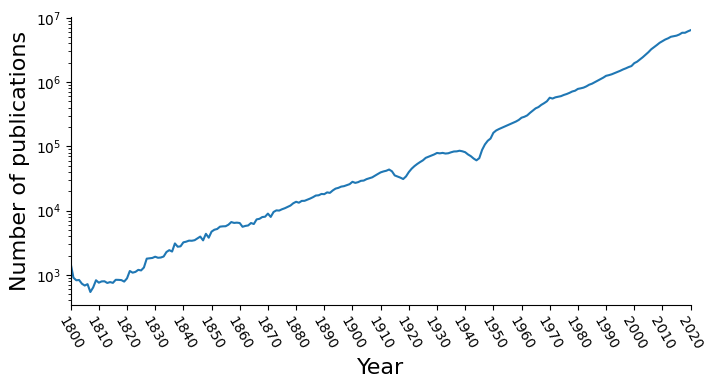

In [6]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
sty = 'default'
mpl.style.use(sty)
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot("Year", "count", '-', data = df_SSN_cnt[:-2])
# ax1.plot("Year", "sum", '-', data = df_SSN_CC_cnt)
ax1.set_yscale('log')
ax1.set_xlabel('Year',fontsize = 16)
ax1.set_ylabel('Number of publications',fontsize = 16)
# plt.xlim(left=1800, righy=2020)
# plt.xlim(left=1800)
plt.xticks(np.arange(1800, 2021, 10),rotation=300)
spacing = 0.400
fig.subplots_adjust(bottom=spacing)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.xlim([1800, 2020])
# fig.savefig("MAG-General/MAG_PubCount_Yearly.pdf", bbox_inches='tight')

In [100]:
# fig.savefig("./Figures/3_Fig_PubCount_Yearly.pdf", bbox_inches='tight')

In [7]:
%%time
import csv
import pandas as pd

df_f = pd.read_csv('../Final-SciNet-Tables/SciNet_Fields.tsv', sep='\t')
df_f

CPU times: user 3.09 ms, sys: 1.78 ms, total: 4.87 ms
Wall time: 14.3 ms


,FieldID,Field_Name,Field_Type
0,3079626,Quantum electrodynamics,Sub
1,37914503,Mathematical physics,Sub
2,159047783,Virology,Sub
3,70410870,Clinical psychology,Sub
4,187212893,Pediatrics,Sub
...,...,...,...
306,70721500,Computational biology,Sub
307,42360764,Chemical engineering,Sub
308,178550888,Business administration,Sub
309,13736549,Industrial engineering,Sub


In [8]:
df_f_top = df_f.loc[df_f['Field_Type'] == 'Top', :]
print(len(df_f_top))
df_f_top[:5]

19


,FieldID,Field_Name,Field_Type
8,95457728,History,Top
11,127313418,Geology,Top
29,162324750,Economics,Top
53,205649164,Geography,Top
76,185592680,Chemistry,Top


In [9]:
%%time
import csv
import pandas as pd

df_pf = pd.read_csv('../Final-SciNet-Tables/SciNet_PaperFields.tsv', sep='\t')
df_pf

CPU times: user 1min 32s, sys: 19.5 s, total: 1min 51s
Wall time: 1min 52s


,PaperID,FieldID,Hit_1pct,Hit_5pct,Hit_10pct,C_f
0,18936224,71924100,0.0,0.0,0.0,0.731404
1,94748468,144024400,0.0,0.0,0.0,0.000000
2,113998959,71924100,0.0,0.0,0.0,0.270789
3,56740461,144133560,0.0,0.0,0.0,0.328162
4,23,71924100,0.0,0.0,0.0,0.169123
...,...,...,...,...,...,...
277494989,3204507150,188027245,0.0,0.0,0.0,0.000000
277494990,3204507160,187212893,0.0,0.0,0.0,0.000000
277494991,3204507164,143998085,0.0,0.0,0.0,0.000000
277494992,3204507164,126322002,0.0,0.0,0.0,0.000000


In [10]:
%%time
import csv
import pandas as pd
date_str = '2021-12-06'
df_MAG_FC = pd.read_csv('../../MAG_'+date_str+'/advanced/FieldOfStudyChildren.txt', sep='\t', header=None, 
                     quoting=csv.QUOTE_NONE)

df_MAG_FC

CPU times: user 188 ms, sys: 30.9 ms, total: 219 ms
Wall time: 415 ms


,0,1
0,12843,8105449
1,12843,9061790
2,12843,71383303
3,12843,105805003
4,12843,112019140
...,...,...
840140,3020813896,2908911905
840141,3020813896,2909071456
840142,3020813896,2909748413
840143,3020813896,2910608702


In [11]:
df_MAG_FC_Sel = df_MAG_FC.loc[df_MAG_FC[0].isin(df_f_top['FieldID']),:]
df_MAG_FC_Sel

,0,1
24251,15744967,11171543
24252,15744967,19417346
24253,15744967,46312422
24254,15744967,70410870
24255,15744967,73484699
...,...,...
454414,205649164,100970517
454415,205649164,148383697
454416,205649164,153294291
454417,205649164,166957645


In [12]:
df_MAG_FC_Sel = df_MAG_FC_Sel.copy()
df_MAG_FC_Sel.rename(columns={0:'Top_FieldID',1:'FieldID'}, inplace=True)
df_MAG_FC_Sel

,Top_FieldID,FieldID
24251,15744967,11171543
24252,15744967,19417346
24253,15744967,46312422
24254,15744967,70410870
24255,15744967,73484699
...,...,...
454414,205649164,100970517
454415,205649164,148383697
454416,205649164,153294291
454417,205649164,166957645


In [13]:
%%time
df_pf_top = df_pf.loc[df_pf['FieldID'].isin(df_f_top['FieldID']),:]
df_pf_top

CPU times: user 13.6 s, sys: 1.55 s, total: 15.1 s
Wall time: 15.2 s


,PaperID,FieldID,Hit_1pct,Hit_5pct,Hit_10pct,C_f
0,18936224,71924100,0.0,0.0,0.0,0.731404
1,94748468,144024400,0.0,0.0,0.0,0.000000
2,113998959,71924100,0.0,0.0,0.0,0.270789
3,56740461,144133560,0.0,0.0,0.0,0.328162
4,23,71924100,0.0,0.0,0.0,0.169123
...,...,...,...,...,...,...
116942136,3204507145,41008148,0.0,0.0,0.0,0.000000
116942137,3204507150,185592680,0.0,0.0,0.0,0.000000
116942138,3204507160,71924100,0.0,0.0,0.0,0.000000
116942139,3204507164,71924100,0.0,0.0,0.0,0.000000


In [14]:
%%time
df_pf_sub = df_pf.loc[~df_pf['FieldID'].isin(df_f_top['FieldID']),:]
df_pf_sub

CPU times: user 13.7 s, sys: 4.3 s, total: 18 s
Wall time: 18 s


,PaperID,FieldID,Hit_1pct,Hit_5pct,Hit_10pct,C_f
116942141,94748468,95124753,0.0,0.0,0.0,0.000000
116942142,94748468,36289849,0.0,0.0,0.0,0.000000
116942143,113998959,112930515,0.0,0.0,0.0,0.328739
116942144,23,177713679,0.0,0.0,0.0,0.138115
116942145,56740461,136264566,0.0,0.0,0.0,0.324273
...,...,...,...,...,...,...
277494989,3204507150,188027245,0.0,0.0,0.0,0.000000
277494990,3204507160,187212893,0.0,0.0,0.0,0.000000
277494991,3204507164,143998085,0.0,0.0,0.0,0.000000
277494992,3204507164,126322002,0.0,0.0,0.0,0.000000


In [15]:
%%time
df_pf_sub_merge = df_pf_sub[['FieldID','PaperID']].merge(df_MAG_FC_Sel, how="left", on='FieldID')
df_pf_sub_merge

CPU times: user 21.2 s, sys: 5.38 s, total: 26.6 s
Wall time: 26.7 s


,FieldID,PaperID,Top_FieldID
0,95124753,94748468,138885662
1,36289849,94748468,144024400
2,112930515,113998959,71924100
3,112930515,113998959,144133560
4,177713679,23,71924100
...,...,...,...
199910372,188027245,3204507150,192562407
199910373,187212893,3204507160,71924100
199910374,143998085,3204507164,71924100
199910375,126322002,3204507164,71924100


In [16]:
df_pf_sub_merge.rename(columns={'FieldID':'Sub_FieldID','Top_FieldID':'FieldID'}, inplace=True)
# df_pf_sub_merge.rename(columns={'SubFieldID':'Sub_FieldID','Top_FieldID':'FieldID'}, inplace=True)
df_pf_sub_merge

,Sub_FieldID,PaperID,FieldID
0,95124753,94748468,138885662
1,36289849,94748468,144024400
2,112930515,113998959,71924100
3,112930515,113998959,144133560
4,177713679,23,71924100
...,...,...,...
199910372,188027245,3204507150,192562407
199910373,187212893,3204507160,71924100
199910374,143998085,3204507164,71924100
199910375,126322002,3204507164,71924100


In [17]:
df_pf_top

,PaperID,FieldID,Hit_1pct,Hit_5pct,Hit_10pct,C_f
0,18936224,71924100,0.0,0.0,0.0,0.731404
1,94748468,144024400,0.0,0.0,0.0,0.000000
2,113998959,71924100,0.0,0.0,0.0,0.270789
3,56740461,144133560,0.0,0.0,0.0,0.328162
4,23,71924100,0.0,0.0,0.0,0.169123
...,...,...,...,...,...,...
116942136,3204507145,41008148,0.0,0.0,0.0,0.000000
116942137,3204507150,185592680,0.0,0.0,0.0,0.000000
116942138,3204507160,71924100,0.0,0.0,0.0,0.000000
116942139,3204507164,71924100,0.0,0.0,0.0,0.000000


In [18]:
df_pf_sub_merge

,Sub_FieldID,PaperID,FieldID
0,95124753,94748468,138885662
1,36289849,94748468,144024400
2,112930515,113998959,71924100
3,112930515,113998959,144133560
4,177713679,23,71924100
...,...,...,...
199910372,188027245,3204507150,192562407
199910373,187212893,3204507160,71924100
199910374,143998085,3204507164,71924100
199910375,126322002,3204507164,71924100


In [19]:
%%time
df_pf_top = df_pf_top.copy()
df_pf_top.drop(columns=['Hit_1pct','Hit_5pct','Hit_10pct','C_f'], inplace=True)
df_pf_sub_merge.drop(columns=['Sub_FieldID'], inplace=True)

CPU times: user 5.14 s, sys: 6.34 s, total: 11.5 s
Wall time: 11.5 s


In [20]:
df_pf_top

,PaperID,FieldID
0,18936224,71924100
1,94748468,144024400
2,113998959,71924100
3,56740461,144133560
4,23,71924100
...,...,...
116942136,3204507145,41008148
116942137,3204507150,185592680
116942138,3204507160,71924100
116942139,3204507164,71924100


In [21]:
df_pf_sub_merge

,PaperID,FieldID
0,94748468,138885662
1,94748468,144024400
2,113998959,71924100
3,113998959,144133560
4,23,71924100
...,...,...
199910372,3204507150,192562407
199910373,3204507160,71924100
199910374,3204507164,71924100
199910375,3204507164,71924100


In [22]:
%%time
df_pf_tot = pd.concat([df_pf_top, df_pf_sub_merge], ignore_index=True)
df_pf_tot

CPU times: user 1.17 s, sys: 991 ms, total: 2.16 s
Wall time: 2.16 s


,PaperID,FieldID
0,18936224,71924100
1,94748468,144024400
2,113998959,71924100
3,56740461,144133560
4,23,71924100
...,...,...
316852513,3204507150,192562407
316852514,3204507160,71924100
316852515,3204507164,71924100
316852516,3204507164,71924100


In [23]:
%%time
df_pf_tot = df_pf_tot.drop_duplicates(subset=['PaperID', 'FieldID'])
df_pf_tot

CPU times: user 1min 29s, sys: 9.76 s, total: 1min 39s
Wall time: 1min 39s


,PaperID,FieldID
0,18936224,71924100
1,94748468,144024400
2,113998959,71924100
3,56740461,144133560
4,23,71924100
...,...,...
316852502,3204507055,127413603
316852504,3204507058,71924100
316852506,3204507100,127413603
316852513,3204507150,192562407


In [24]:
%%time
SciNet_PaperFields_Top_cnt = df_pf_tot.groupby(['FieldID'])['PaperID'].agg(['count']).reset_index()
SciNet_PaperFields_Top_Sorted = SciNet_PaperFields_Top_cnt.sort_values(by='count',ascending=False)
SciNet_PaperFields_Top_Sorted

CPU times: user 3.2 s, sys: 1.06 s, total: 4.26 s
Wall time: 4.27 s


,FieldID,count
5,71924100,34540540
6,86803240,23883760
16,185592680,17082264
10,127413603,14107330
4,41008148,13734811
8,121332964,11979711
17,192562407,10557999
2,33923547,9901225
0,15744967,9521343
15,162324750,8552376


In [25]:
df_MAG_F_Lv0 = df_f_top.copy()

In [26]:
SciNet_PaperFields_Top_SortedName = SciNet_PaperFields_Top_Sorted.merge(
    df_MAG_F_Lv0[['FieldID', 'Field_Name']], how='inner', on='FieldID')
SciNet_PaperFields_Top_SortedName

,FieldID,count,Field_Name
0,71924100,34540540,Medicine
1,86803240,23883760,Biology
2,185592680,17082264,Chemistry
3,127413603,14107330,Engineering
4,41008148,13734811,Computer science
5,121332964,11979711,Physics
6,192562407,10557999,Materials science
7,33923547,9901225,Mathematics
8,15744967,9521343,Psychology
9,162324750,8552376,Economics


CPU times: user 41.4 ms, sys: 13.9 ms, total: 55.2 ms
Wall time: 55.1 ms


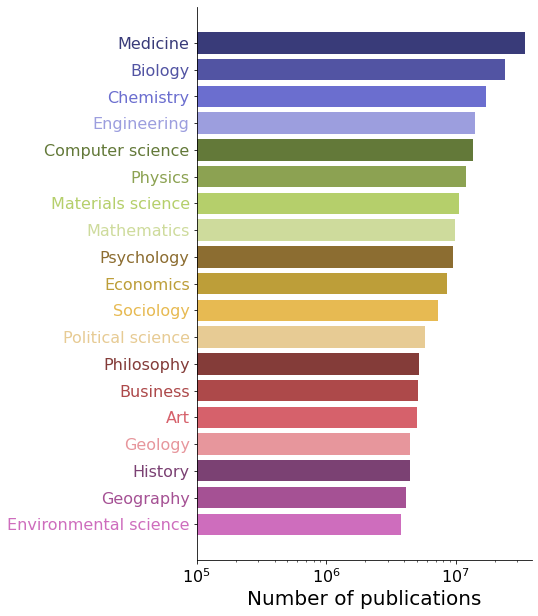

In [27]:
%%time
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
colors = [i for i in cm.get_cmap('tab20b').colors]
# fig, ax1 = plt.subplots(figsize=(6,16))
fig, ax1 = plt.subplots(figsize=(6,16))
x = np.arange(len(SciNet_PaperFields_Top_SortedName))
plt.barh(x, SciNet_PaperFields_Top_SortedName["count"].values, color=colors)
# plt.xticks(x, df_MAG_PF_Lv0_Sel_Cnt_Sorted_Name["Field_Name"].values, rotation='vertical',fontsize=16)
plt.yticks(x, SciNet_PaperFields_Top_SortedName["Field_Name"].values, fontsize=16)

for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), colors):
    ticklabel.set_color(tickcolor)

ax1.set_xscale('log')
ax1.tick_params(axis='x', labelsize=16)
# ax1.yaxis.offsetText.set_fontsize(16)
spacing = 0.400
fig.subplots_adjust(bottom=spacing)
# ax1.set_xlabel('Number of publications with fields of study identification', fontsize = 20)
ax1.set_xlabel('Number of publications', fontsize = 20)
ax1.set_xticks([10**5,10**6,10**7])
ax1.invert_yaxis()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# fig.savefig("MAG-General/SciNet_Field_General.pdf", bbox_inches='tight')


CPU times: user 39.2 ms, sys: 3.96 ms, total: 43.2 ms
Wall time: 37.4 ms


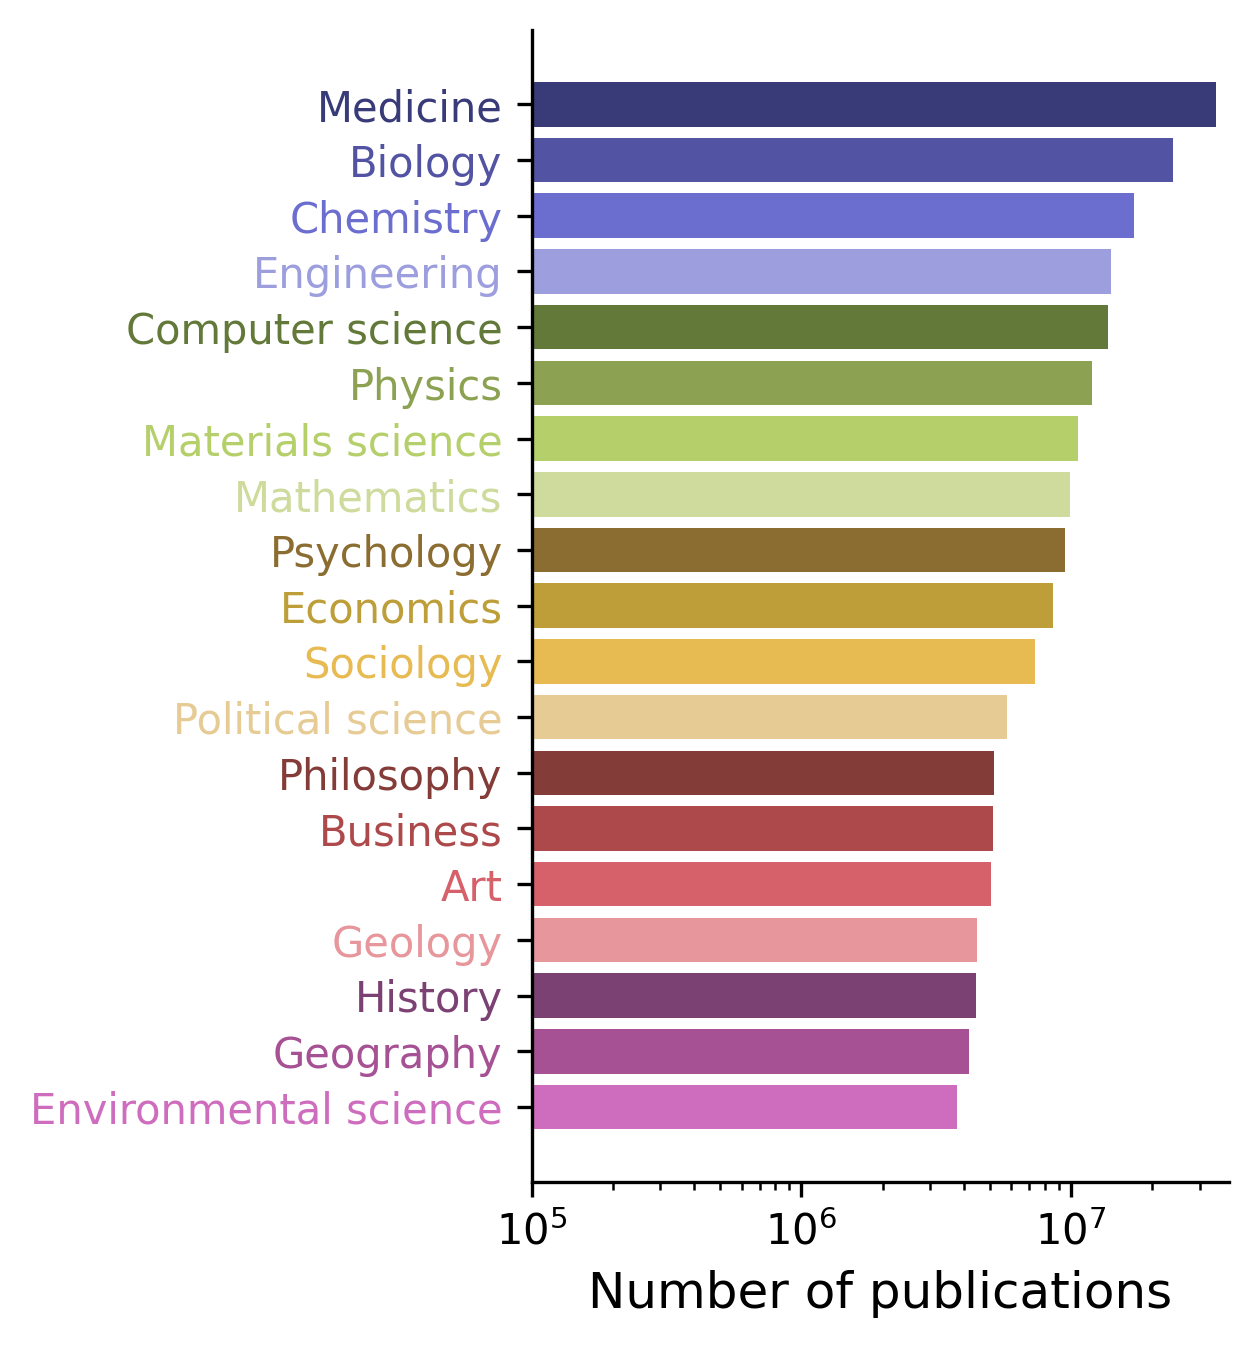

In [28]:
%%time
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
colors = [i for i in cm.get_cmap('tab20b').colors]
# fig, ax1 = plt.subplots(figsize=(6,16))
fig, ax1 = plt.subplots(figsize=(3,8),dpi=300)
x = np.arange(len(SciNet_PaperFields_Top_SortedName))
plt.barh(x, SciNet_PaperFields_Top_SortedName["count"].values, color=colors)
# plt.xticks(x, df_MAG_PF_Lv0_Sel_Cnt_Sorted_Name["Field_Name"].values, rotation='vertical',fontsize=16)
plt.yticks(x, SciNet_PaperFields_Top_SortedName["Field_Name"].values, fontsize=10)

for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), colors):
    ticklabel.set_color(tickcolor)

ax1.set_xscale('log')
ax1.tick_params(axis='x', labelsize=10)
# ax1.yaxis.offsetText.set_fontsize(16)
spacing = 0.400
fig.subplots_adjust(bottom=spacing)
# ax1.set_xlabel('Number of publications with fields of study identification', fontsize = 20)
ax1.set_xlabel('Number of publications', fontsize = 12)
ax1.set_xticks([10**5,10**6,10**7])
ax1.invert_yaxis()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# fig.savefig("MAG-General/SciNet_Field_General.pdf", bbox_inches='tight')


In [97]:
# fig.savefig("Figures/3_SciSciNet_Field_General4.pdf", bbox_inches='tight')

In [29]:
df_paper['Team_Size']

0            2.0
1            3.0
2            1.0
3            3.0
4            3.0
            ... 
134129183    4.0
134129184    8.0
134129185    3.0
134129186    2.0
134129187    6.0
Name: Team_Size, Length: 134129188, dtype: float64

In [30]:
%%time
SciNet_PaperFieldsTeamYear = df_pf_tot.merge(
    df_paper[['PaperID','Team_Size','Year']], how='left', on='PaperID')
SciNet_PaperFieldsTeamYear

CPU times: user 1min 34s, sys: 13.7 s, total: 1min 48s
Wall time: 1min 48s


,PaperID,FieldID,Team_Size,Year
0,18936224,71924100,3.0,2009.0
1,94748468,144024400,1.0,2000.0
2,113998959,71924100,3.0,2003.0
3,56740461,144133560,1.0,1995.0
4,23,71924100,3.0,2012.0
...,...,...,...,...
199209156,3204507055,127413603,2.0,2021.0
199209157,3204507058,71924100,5.0,2021.0
199209158,3204507100,127413603,2.0,1990.0
199209159,3204507150,192562407,9.0,2022.0


In [31]:
%%time
SciNet_PaperFieldsTeam_GBY = SciNet_PaperFieldsTeamYear.groupby(['Year'], as_index=False)

CPU times: user 274 µs, sys: 0 ns, total: 274 µs
Wall time: 278 µs


In [32]:
%%time
SciNet_PaperFieldsTeam_GBF = SciNet_PaperFieldsTeamYear.groupby(['FieldID'], sort=False, as_index=False)

CPU times: user 443 µs, sys: 0 ns, total: 443 µs
Wall time: 454 µs


In [33]:
%%time
sample_n = 50
import numpy as np
def CalculateCI(x, method):    
    data = x
    m = int(len(data)/10) # take 10% data
    ms = []
    for j in range(sample_n): # number of samples   
        if method=='mean':
                ms.append(np.mean(np.random.choice(data,m)))
        if method=='median':
                ms.append(np.median(np.random.choice(data,m)))
    a, b=[np.percentile(ms,2.5), np.percentile(ms,97.5)]
    return a, b

CPU times: user 0 ns, sys: 30 µs, total: 30 µs
Wall time: 203 µs


In [34]:
# len(df_paper[df_paper['Team_Size'] > 0])

In [35]:
len(SciNet_PaperFieldsTeamYear)

199209161

In [36]:
len(SciNet_PaperFieldsTeamYear[SciNet_PaperFieldsTeamYear['Team_Size'] > 0])

199141412

100%|██████████| 19/19 [00:37<00:00,  1.96s/it]


CPU times: user 59 s, sys: 7.47 s, total: 1min 6s
Wall time: 1min 9s


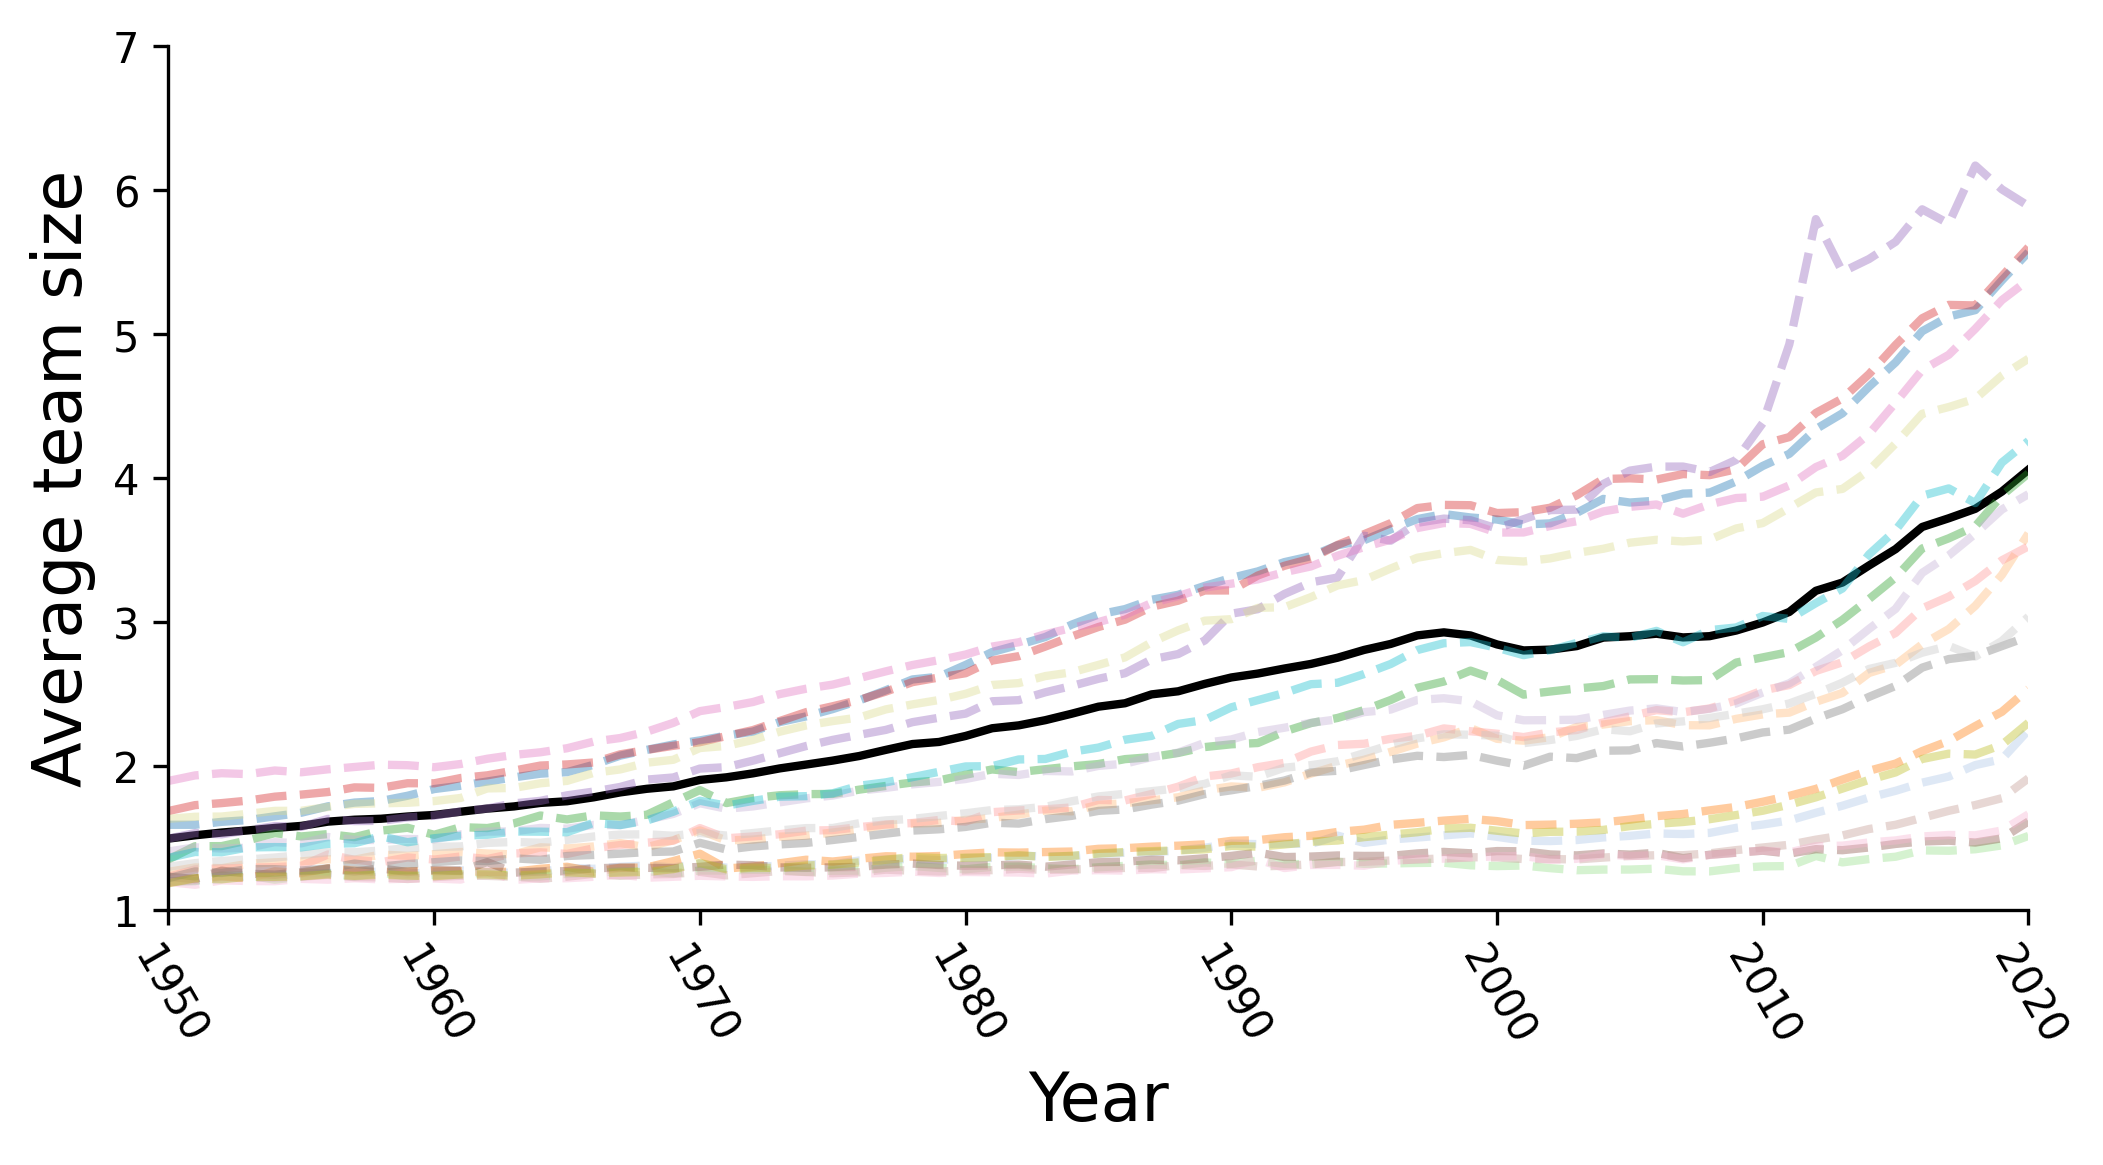

In [37]:
%%time
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from matplotlib import cm
# sty = 'default'
# mpl.style.use(sty)
# fig, ax1 = plt.subplots(dpi=300)
fig, ax1 = plt.subplots(figsize=(8, 6),dpi=300)
colors = [i for i in cm.get_cmap('tab20').colors]

x = np.arange(1950,2021)

i = 0

Team_avg_Size = []
Ia_list = []
Ib_list = []
df_GY = SciNet_PaperFieldsTeamYear.groupby(['Year'], as_index=False)
for year, df_GFY in df_GY :
    if year < 1950 or year > 2020:
        continue
    res = df_GFY['Team_Size'].sum() / len(df_GFY)
    Team_avg_Size.append(res)
    
#     Ia, Ib = CalculateCI(df_GFY['Team_Size'].values, 'mean')
#     Ia_list.append(Ia)
#     Ib_list.append(Ib)
    
    
ax1.plot(x, Team_avg_Size, '-', color='black', linewidth=2, alpha=1)
# ax1.fill_between(x, Ia_list, Ib_list, color='gray', alpha=0.2)

for field, df_GF in tqdm(SciNet_PaperFieldsTeam_GBF):
    
    df_GY = df_GF.groupby(['Year'], as_index=False)
    Team_avg_Size = []
    
    for year, df_GFY in df_GY:
        if year < 1950 or year > 2020:
            continue
        res = df_GFY['Team_Size'].sum() / len(df_GFY)
        Team_avg_Size.append(res)
    
    ax1.plot(x, Team_avg_Size, '--', color=colors[i], linewidth=2, alpha=0.4)

    i += 1
    
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Average team size', fontsize=16)
plt.xticks(np.arange(1950, 2021, 10), rotation=300)
spacing = 0.400
fig.subplots_adjust(bottom=spacing)
ax1.set_ylim(1,7)
ax1.set_xlim(1950,2020)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

In [76]:
# fig.savefig("Figures/3_TeamSize-Final.pdf", bbox_inches='tight')

In [38]:
%%time
x = np.arange(1950,2021)

i = 0
# fig, ax1 = plt.subplots(figsize=(8, 6),dpi=300)
Central_Team_avg_Size = []
Total_Team_avg_Size = []
Total_Team_avg_Size_Dict = {}
Ia_list = []
Ib_list = []
df_GY = SciNet_PaperFieldsTeamYear.groupby(['Year'], as_index=False)
for year, df_GFY in df_GY :
    if year < 1950 or year > 2020:
        continue
    res = df_GFY['Team_Size'].sum() / len(df_GFY)
    Central_Team_avg_Size.append(res)
# ax1.plot(x, Team_avg_Size, '-', color='black', linewidth=2, alpha=1)


for field, df_GF in tqdm(SciNet_PaperFieldsTeam_GBF):
    
    df_GY = df_GF.groupby(['Year'], as_index=False)
    Team_avg_Size = []
    
    for year, df_GFY in df_GY:
        if year < 1950 or year > 2020:
            continue
        res = df_GFY['Team_Size'].sum() / len(df_GFY)
        Team_avg_Size.append(res)
    Total_Team_avg_Size.append(Team_avg_Size)
    Total_Team_avg_Size_Dict[field] = Team_avg_Size
#     ax1.plot(x, Team_avg_Size, '--', color=colors[i], linewidth=2, alpha=0.4)

    i += 1

100%|██████████| 19/19 [00:37<00:00,  1.95s/it]

CPU times: user 53.1 s, sys: 6.05 s, total: 59.2 s
Wall time: 59.2 s


In [39]:
SciNet_PaperFields_Top_SortedName['FieldID'].values

array([ 71924100,  86803240, 185592680, 127413603,  41008148, 121332964,
       192562407,  33923547,  15744967, 162324750, 144024400,  17744445,
       138885662, 144133560, 142362112, 127313418,  95457728, 205649164,
        39432304])

CPU times: user 113 ms, sys: 36.5 ms, total: 149 ms
Wall time: 146 ms


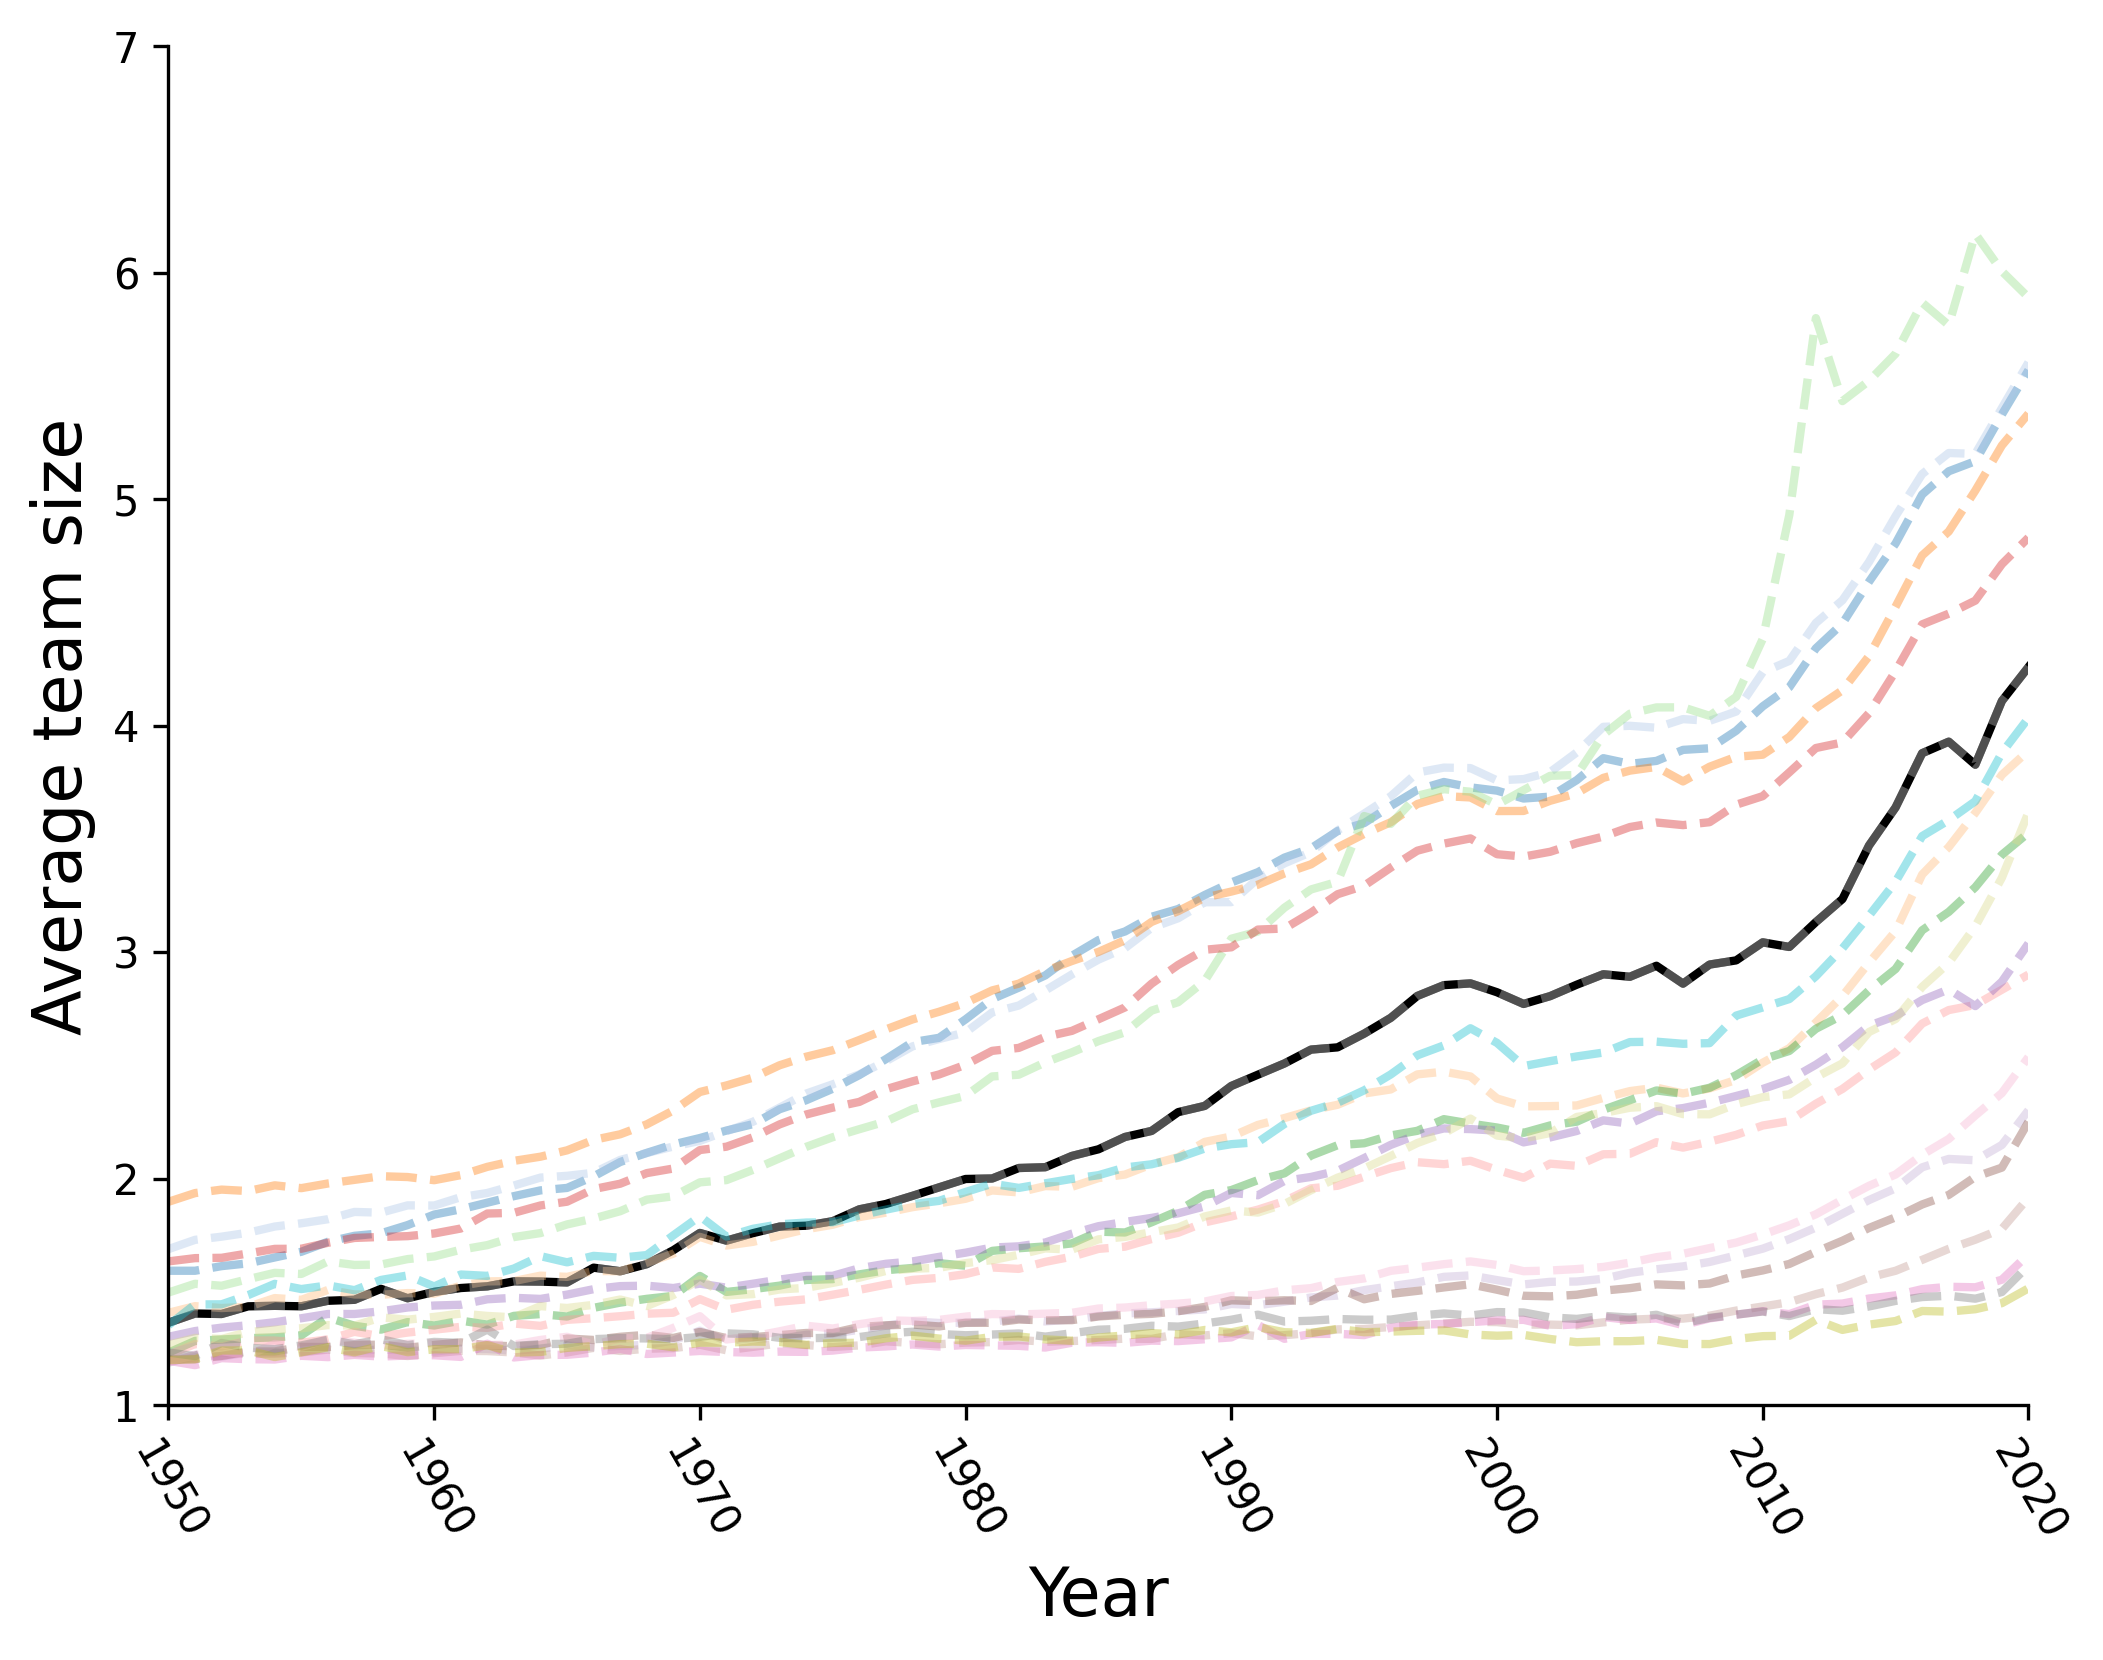

In [40]:
%%time

colors = [i for i in cm.get_cmap('tab20').colors]
i = 0
fig, ax1 = plt.subplots(figsize=(8, 6),dpi=300)
x = np.arange(1950,2021)
ax1.plot(x, Team_avg_Size, '-', color='black', linewidth=2, alpha=1)
for each in SciNet_PaperFields_Top_SortedName['FieldID'].values:
    ax1.plot(x, Total_Team_avg_Size_Dict[each], '--', color=colors[i], linewidth=2, alpha=0.4)
    i += 1
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Average team size', fontsize=16)
plt.xticks(np.arange(1950, 2021, 10), rotation=300)
spacing = 0.400
# fig.subplots_adjust(bottom=spacing)
ax1.set_ylim(1,7)
ax1.set_xlim(1950,2020)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

In [43]:
# %%time
# fig3 = plt.figure(figsize=(12,8), constrained_layout=True)
# gs = fig3.add_gridspec(3, 3)
# ax1 = fig3.add_subplot(gs[:,0])
                             
# # fig,ax0 = plt.subplots(2,3,figsize=(12,8),constrained_layout=True)
# # ax1 = plt.subplot(1,3,1)
# x = np.arange(len(SciNet_PaperFields_Top_SortedName))
# plt.barh(x, SciNet_PaperFields_Top_SortedName["count"].values, color=colors)
# # plt.xticks(x, df_MAG_PF_Lv0_Sel_Cnt_Sorted_Name["Field_Name"].values, rotation='vertical',fontsize=16)
# plt.yticks(x, SciNet_PaperFields_Top_SortedName["Field_Name"].values, fontsize=10)

# for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), colors):
#     ticklabel.set_color(tickcolor)

# ax1.set_xscale('log')
# ax1.tick_params(axis='x', labelsize=10)
# # ax1.yaxis.offsetText.set_fontsize(16)
# spacing = 0.400
# # fig.subplots_adjust(bottom=spacing)
# # ax1.set_xlabel('Number of publications with fields of study identification', fontsize = 20)
# ax1.set_xlabel('Number of publications', fontsize = 12)
# ax1.set_xticks([10**5,10**6,10**7])
# ax1.invert_yaxis()
# ax1.spines['top'].set_visible(False)
# ax1.spines['right'].set_visible(False)


# ax1 = fig3.add_subplot(gs[0,1:])
# # fig, ax1 = plt.subplots(figsize=(8,6))
# ax1.plot("Year", "count", '-', data = df_SSN_cnt[:-2])
# # ax1.plot("Year", "sum", '-', data = df_SSN_CC_cnt)
# ax1.set_yscale('log')
# ax1.set_xlabel('Year',fontsize = 16)
# ax1.set_ylabel('Number of publications',fontsize = 16)
# # plt.xlim(left=1800, righy=2020)
# # plt.xlim(left=1800)
# plt.xticks(np.arange(1800, 2021, 10),rotation=300)
# spacing = 0.400
# # fig.subplots_adjust(bottom=spacing)
# ax1.spines['top'].set_visible(False)
# ax1.spines['right'].set_visible(False)
# plt.xlim([1800, 2020])


# ax1 = fig3.add_subplot(gs[1,1:])
# x = np.arange(1950,2021)
# i = 0
# Team_avg_Size = []
# Ia_list = []
# Ib_list = []
# df_GY = SciNet_PaperFieldsTeamYear.groupby(['Year'], as_index=False)
# for year, df_GFY in df_GY :
#     if year < 1950 or year > 2020:
#         continue
#     res = df_GFY['Team_Size'].sum() / len(df_GFY)
#     Team_avg_Size.append(res)
    
# ax1.plot(x, Team_avg_Size, '-', color='black', linewidth=2, alpha=1)
# # ax1.fill_between(x, Ia_list, Ib_list, color='gray', alpha=0.2)

# for field, df_GF in tqdm(SciNet_PaperFieldsTeam_GBF):
    
#     df_GY = df_GF.groupby(['Year'], as_index=False)
#     Team_avg_Size = []
    
#     for year, df_GFY in df_GY:
#         if year < 1950 or year > 2020:
#             continue
#         res = df_GFY['Team_Size'].sum() / len(df_GFY)
#         Team_avg_Size.append(res)
    
#     ax1.plot(x, Team_avg_Size, '--', color=colors[i], linewidth=2, alpha=0.4)

#     i += 1
    
# ax1.set_xlabel('Year', fontsize=16)
# ax1.set_ylabel('Average team size', fontsize=16)
# plt.xticks(np.arange(1950, 2021, 10), rotation=300)
# spacing = 0.400
# # fig.subplots_adjust(bottom=spacing)
# ax1.set_ylim(1,7)
# ax1.set_xlim(1950,2020)
# ax1.spines['top'].set_visible(False)
# ax1.spines['right'].set_visible(False)

CPU times: user 903 ms, sys: 209 ms, total: 1.11 s
Wall time: 11.2 s


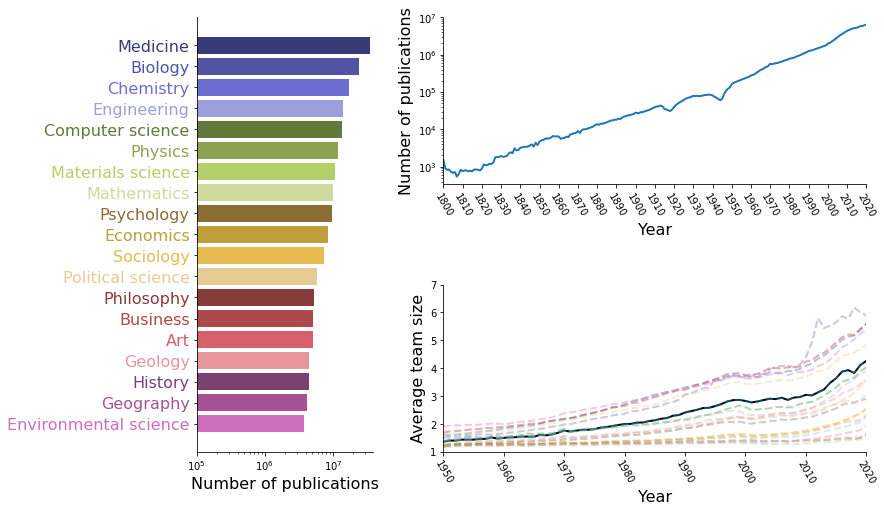

In [41]:
%%time
fig3 = plt.figure(figsize=(12,8))
gs = fig3.add_gridspec(2, 3)
ax1 = fig3.add_subplot(gs[:,:1])
x = np.arange(len(SciNet_PaperFields_Top_SortedName))
colors = [i for i in cm.get_cmap('tab20b').colors]
plt.barh(x, SciNet_PaperFields_Top_SortedName["count"].values, color=colors)
# plt.xticks(x, df_MAG_PF_Lv0_Sel_Cnt_Sorted_Name["Field_Name"].values, rotation='vertical',fontsize=16)
plt.yticks(x, SciNet_PaperFields_Top_SortedName["Field_Name"].values, fontsize=16)

for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), colors):
    ticklabel.set_color(tickcolor)

ax1.set_xscale('log')
ax1.tick_params(axis='x', labelsize=10)
# ax1.yaxis.offsetText.set_fontsize(16)
spacing = 0.400
# fig.subplots_adjust(bottom=spacing)
# ax1.set_xlabel('Number of publications with fields of study identification', fontsize = 20)
ax1.set_xlabel('Number of publications', fontsize = 16)
ax1.set_xticks([10**5,10**6,10**7])
ax1.invert_yaxis()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# ax1.set_aspect(aspect=0.4)


ax1 = fig3.add_subplot(gs[0,1:])
# fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot("Year", "count", '-', data = df_SSN_cnt[:-2], linewidth=2, alpha=1)
# ax1.plot("Year", "sum", '-', data = df_SSN_CC_cnt)
ax1.set_yscale('log')
ax1.set_xlabel('Year',fontsize = 16)
ax1.set_ylabel('Number of publications',fontsize = 16)
# plt.xlim(left=1800, righy=2020)
# plt.xlim(left=1800)
plt.xticks(np.arange(1800, 2021, 10),rotation=300)
spacing = 0.400
# fig.subplots_adjust(bottom=spacing)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.xlim([1800, 2020])


ax1 = fig3.add_subplot(gs[1,1:])
colors = [i for i in cm.get_cmap('tab20').colors]
i = 0
x = np.arange(1950,2021)
ax1.plot(x, Team_avg_Size, '-', color='black', linewidth=2, alpha=1)
for each in Total_Team_avg_Size:
    ax1.plot(x, each, '--', color=colors[i], linewidth=2, alpha=0.4)
    i += 1
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Average team size', fontsize=16)
plt.xticks(np.arange(1950, 2021, 10), rotation=300)
spacing = 0.400
# fig.subplots_adjust(bottom=spacing)
ax1.set_ylim(1,7)
ax1.set_xlim(1950,2020)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.subplots_adjust(wspace=0.4, hspace=0.6)
# fig3.tight_layout(w_pad=2, h_pad=1.5)
fig3.savefig("Figures/3_TeamSize-Final_Huge2.pdf", bbox_inches='tight', format="pdf")

In [45]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

CPU times: user 893 ms, sys: 27.8 ms, total: 920 ms
Wall time: 1.43 s


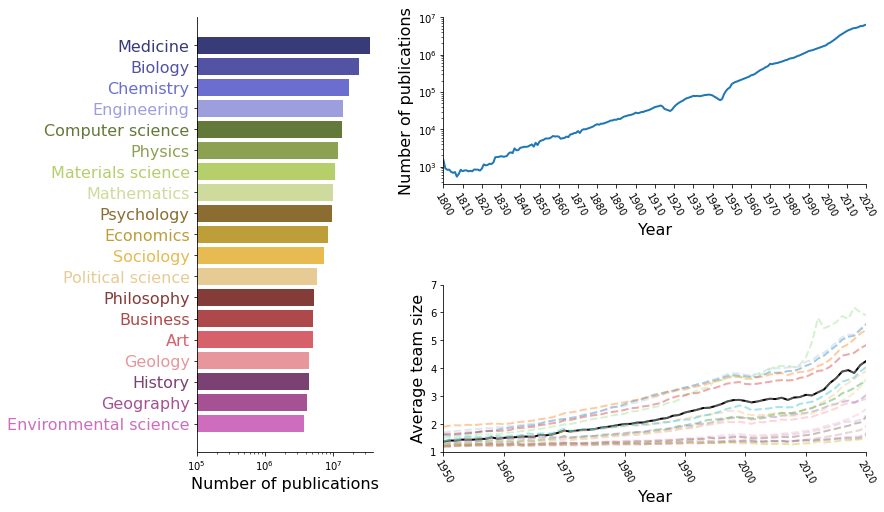

In [46]:
%%time
fig3 = plt.figure(figsize=(12,8))
gs = fig3.add_gridspec(2, 3)
ax1 = fig3.add_subplot(gs[:,:1])
x = np.arange(len(SciNet_PaperFields_Top_SortedName))
colors = [i for i in cm.get_cmap('tab20b').colors]
plt.barh(x, SciNet_PaperFields_Top_SortedName["count"].values, color=colors)
# plt.xticks(x, df_MAG_PF_Lv0_Sel_Cnt_Sorted_Name["Field_Name"].values, rotation='vertical',fontsize=16)
plt.yticks(x, SciNet_PaperFields_Top_SortedName["Field_Name"].values, fontsize=16)

for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), colors):
    ticklabel.set_color(tickcolor)

ax1.set_xscale('log')
ax1.tick_params(axis='x', labelsize=10)
# ax1.yaxis.offsetText.set_fontsize(16)
spacing = 0.400
# fig.subplots_adjust(bottom=spacing)
# ax1.set_xlabel('Number of publications with fields of study identification', fontsize = 20)
ax1.set_xlabel('Number of publications', fontsize = 16)
ax1.set_xticks([10**5,10**6,10**7])
ax1.invert_yaxis()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# ax1.set_aspect(aspect=0.4)


ax1 = fig3.add_subplot(gs[0,1:])
# fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot("Year", "count", '-', data = df_SSN_cnt[:-2], linewidth=2, alpha=1)
# ax1.plot("Year", "sum", '-', data = df_SSN_CC_cnt)
ax1.set_yscale('log')
ax1.set_xlabel('Year',fontsize = 16)
ax1.set_ylabel('Number of publications',fontsize = 16)
# plt.xlim(left=1800, righy=2020)
# plt.xlim(left=1800)
plt.xticks(np.arange(1800, 2021, 10),rotation=300)
spacing = 0.400
# fig.subplots_adjust(bottom=spacing)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.xlim([1800, 2020])


ax1 = fig3.add_subplot(gs[1,1:])
colors = [i for i in cm.get_cmap('tab20').colors]
i = 0
x = np.arange(1950,2021)
ax1.plot(x, Team_avg_Size, '-', color='black', linewidth=2, alpha=1)
for each in SciNet_PaperFields_Top_SortedName['FieldID'].values:
    ax1.plot(x, Total_Team_avg_Size_Dict[each], '--', color=colors[i], linewidth=2, alpha=0.4)
    i += 1
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Average team size', fontsize=16)
plt.xticks(np.arange(1950, 2021, 10), rotation=300)
spacing = 0.400
# fig.subplots_adjust(bottom=spacing)
ax1.set_ylim(1,7)
ax1.set_xlim(1950,2020)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.subplots_adjust(wspace=0.4, hspace=0.6)
# fig3.tight_layout(w_pad=2, h_pad=1.5)
fig3.savefig("Figures/3_TeamSize-Final_Huge2.pdf", bbox_inches='tight', format="pdf")